In [3]:
import numpy as np
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import matplotlib.pyplot as plt



In [4]:

#watch jacob code
#make it more clear

#init with the size of the rectangular mesh and the N of elem that you want
#you cant print the elem
#you can get the coord of the vertex that is bottom left
#given a np.matrix with points as rows of the ref element [-1,1]x[-1,1] you cant traslate the points in it 
#with integrate  given the weights as row np array and the points a as a matrix you eval the integral


class rectangular_mesh:
    def __init__(self,Nx,Ny,a,b,c,d):
        self.Nx=Nx
        self.Ny=Ny
        self.a=np.float64(a)
        self.b=np.float64(b)
        self.c=np.float64(c)
        self.d=np.float64(d)
        self.h_x=np.float64((self.b-self.a)/Nx)
        self.h_y=np.float64((self.d-self.c)/Ny)

    def print(self):
        for elem in range(0,(self.Nx)*(self.Ny)):
            print("element number : ",elem)

            x,y=self.get_coordinate(elem)

            
            print("bottom-left vertex : ",x,y)
            print("top-left vertex : ",x,y+self.h_y)
            print("top-right vertex : ",x+self.h_x,y+self.h_y)
            print("bottom-right vertex : ",x+self.h_x,y)




    def get_coordinate(self,elem):
            q,r=divmod(elem, self.Nx) 
            x=np.float64(self.a+self.h_x*r)
            y=np.float64(self.c+self.h_y*q)
            return x,y
    

    
    def traslate_points(self,number_of_elem,input):

    

            x,y=self.get_coordinate(number_of_elem)
            

            input[:, 0] = input[:,0]*self.h_x/2.0  +  x + self.h_x/2.0
        
            input[:, 1] = input[:,1]*self.h_y/2.0  +  y + self.h_y/2.0
    
            return input

    def integrate(self,W,x_quad):
        integral=0.0
        for elem in range(0,self.Nx*self.Ny):
            points_=self.traslate_points(elem,x_quad)
            eval=compute_function_on_rows(points_)
            integral+=np.sum(eval*W)*self.h_x*self.h_y/4.0
        return integral



In [3]:
def f(row):
    return np.cos(row[0]+row[1])

def compute_function_on_rows(matrix):
    result = np.apply_along_axis(f, axis=1, arr=matrix)
    return result

In [7]:
t=rectangular_mesh(2,2,2,3,-1,1)

In [8]:
t.print()

element number :  0
bottom-left vertex :  2.0 -1.0
top-left vertex :  2.0 0.0
top-right vertex :  2.5 0.0
bottom-right vertex :  2.5 -1.0
element number :  1
bottom-left vertex :  2.5 -1.0
top-left vertex :  2.5 0.0
top-right vertex :  3.0 0.0
bottom-right vertex :  3.0 -1.0
element number :  2
bottom-left vertex :  2.0 0.0
top-left vertex :  2.0 1.0
top-right vertex :  2.5 1.0
bottom-right vertex :  2.5 0.0
element number :  3
bottom-left vertex :  2.5 0.0
top-left vertex :  2.5 1.0
top-right vertex :  3.0 1.0
bottom-right vertex :  3.0 0.0


In [6]:
N=[3,4,8,16,32,64]

In [7]:
[x_quad,w_quad] = GaussLobattoJacobiWeights(10, 0, 0)


w=np.asarray(w_quad)
w=np.expand_dims(w, axis=0)

M=w*np.transpose(w)
print(M)

v=M.flatten()
print(v)
print(np.shape(v))


points=[[x,y] for y in x_quad for x in x_quad]
points=np.array(points)

[[0.00049383 0.00296236 0.00499754 0.00648984 0.00727866 0.00727866
  0.00648984 0.00499754 0.00296236 0.00049383]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0299791  0.01777049 0.00296236]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00727866 0.04366301 0.0736602  0.09565559 0.1072823  0.1072823
  0.09565559 0.0736602  0.04366301 0.00727866]
 [0.00648984 0.03893104 0.06567729 0.08528893 0.09565559 0.09565559
  0.08528893 0.06567729 0.03893104 0.00648984]
 [0.00499754 0.0299791  0.05057522 0.06567729 0.0736602  0.0736602
  0.06567729 0.05057522 0.0299791  0.00499754]
 [0.00296236 0.01777049 0.0299791  0.03893104 0.04366301 0.04366301
  0.03893104 0.0

In [8]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

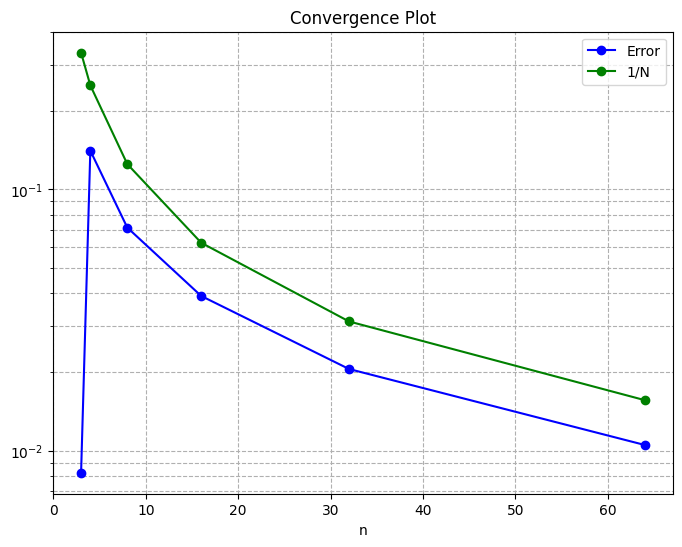

In [9]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [10]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    [x_quad,w_quad] = GaussLobattoJacobiWeights(n, 0, 0)


    w=np.asarray(w_quad)
    w=np.expand_dims(w, axis=0)

    M=w*np.transpose(w)

    v=M.flatten()



    points=[[x,y] for y in x_quad for x in x_quad]
    points=np.array(points)


    res=t.integrate(v,points)
    e.append(np.abs(res-sol))

N=np.asarray(N)

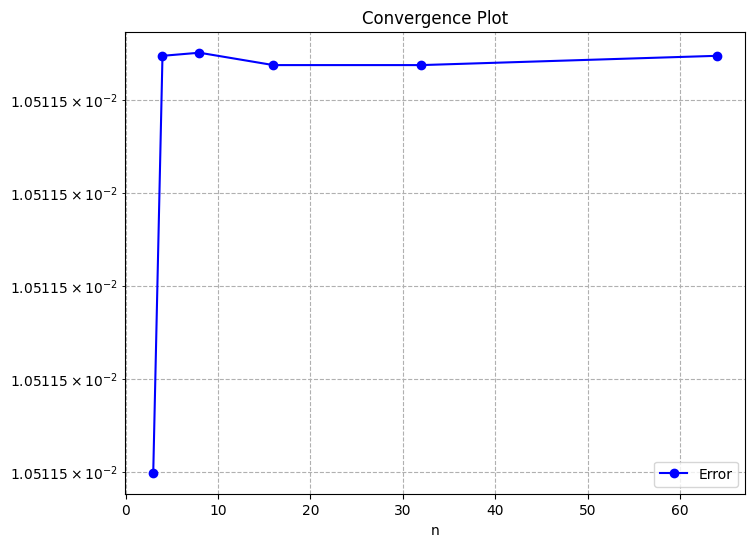

In [11]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [13]:
print(res)

-1.3033094707023252


In [14]:
L=[i for i in range(0,5)]
print(L)
import random
random.shuffle(L)
print(L)

[0, 1, 2, 3, 4]
[2, 0, 4, 3, 1]


In [39]:
import numpy as np
from numpy.polynomial import legendre, chebyshev

# Degree of the quadrature rule
degree = 5

# Gauss-Legendre quadrature points and weights
legendre_points, legendre_weights = legendre.leggauss(degree)

# Chebyshev-Gauss quadrature points and weights (over the interval [-1, 1]),Chebyshev-Gauss quadrature an efficient method for numerical integration, especially for functions with singularities or rapidly oscillating behavior.
chebyshev_points, chebyshev_weights = chebyshev.chebgauss(degree)
chebyshev_points = chebyshev_points[::-1]



print("Gauss-Legendre Quadrature Points:", legendre_points)
print("Gauss-Legendre Quadrature Weights:", legendre_weights)
print()
print("Chebyshev-Gauss Quadrature Points:", chebyshev_points)
print("Chebyshev-Gauss Quadrature Weights:", chebyshev_weights)





Gauss-Legendre Quadrature Points: [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
Gauss-Legendre Quadrature Weights: [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]

Chebyshev-Gauss Quadrature Points: [-9.51056516e-01 -5.87785252e-01  6.12323400e-17  5.87785252e-01
  9.51056516e-01]
Chebyshev-Gauss Quadrature Weights: [0.62831853 0.62831853 0.62831853 0.62831853 0.62831853]


In [36]:
w=np.expand_dims(legendre_weights, axis=0)

M=w*np.transpose(w)

v=M.flatten()
print(v)


points=[[x,y] for y in legendre_points for x in legendre_points]
points=np.array(points)
print(points)



[0.00444507 0.00996412 0.01460678 0.01795237 0.019703   0.019703
 0.01795237 0.01460678 0.00996412 0.00444507 0.00996412 0.02233571
 0.03274275 0.04024227 0.04416649 0.04416649 0.04024227 0.03274275
 0.02233571 0.00996412 0.01460678 0.03274275 0.04799883 0.05899267
 0.06474533 0.06474533 0.05899267 0.04799883 0.03274275 0.01460678
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.019703   0.04416649
 0.06474533 0.07957484 0.08733457 0.08733457 0.07957484 0.06474533
 0.04416649 0.019703   0.019703   0.04416649 0.06474533 0.07957484
 0.08733457 0.08733457 0.07957484 0.06474533 0.04416649 0.019703
 0.01795237 0.04024227 0.05899267 0.07250457 0.07957484 0.07957484
 0.07250457 0.05899267 0.04024227 0.01795237 0.01460678 0.03274275
 0.04799883 0.05899267 0.06474533 0.06474533 0.05899267 0.04799883
 0.03274275 0.01460678 0.00996412 0.02233571 0.03274275 0.04024227
 0.04416649 0.04416649 0.04024227 0.03274275 0.02233571 0.00996412

In [34]:
sol=-np.cos(4)+np.cos(3)+np.cos(2)-np.cos(1)
e=[]
for n in N:
    t=rectangular_mesh(n,n,2,3,-1,1)
    res=t.integrate(v,points)
    e.append(np.abs(res-sol))
N=np.asarray(N)

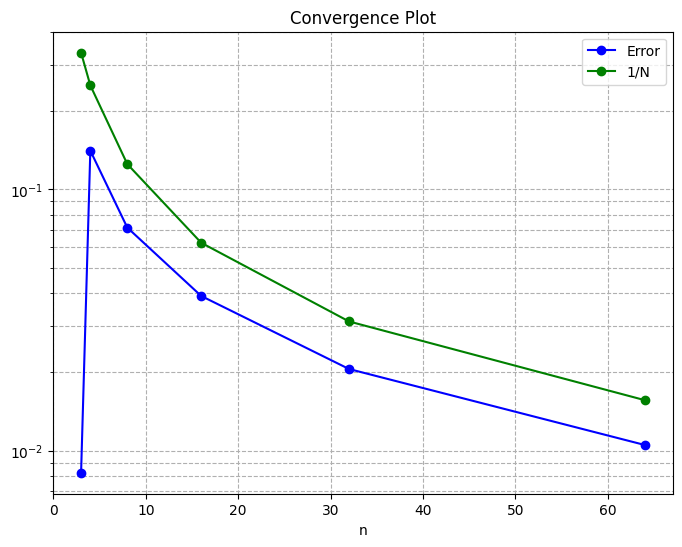

In [35]:
plt.figure(figsize=(8, 6))
plt.semilogy(N, e, marker='o', linestyle='-', color='b', label='Error')
plt.semilogy(N,1/N, marker='o', linestyle='-', color='g', label='1/N')
plt.xlabel('n')
plt.title('Convergence Plot')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()

In [63]:
degree = 3

# Point at which to evaluate the Legendre polynomial and its derivative
x = [-1,1]  # You can change this to any value within the interval [-1, 1]

# Evaluate the Legendre polynomial of the given degree at the specified point
legendre_value = legendre.legval(x, [0] * (degree - 1) + [1])

# Evaluate the derivative of the Legendre polynomial of the given degree at the specified point
legendre_derivative = legendre.legval(x, [0] * (degree - 1) + [0, 1])

print(f"Legendre Polynomial of degree {degree} at x = {x}: {legendre_value}")
print(f"First Derivative of Legendre Polynomial of degree {degree} at x = {x}: {legendre_derivative}")


Legendre Polynomial of degree 3 at x = [-1, 1]: [1. 1.]
First Derivative of Legendre Polynomial of degree 3 at x = [-1, 1]: [-1.  1.]
